# Introduction

Cyclistic is a fictional bike-sharing company located in Chicago. In this scenario I am a junior data analyst working for the Marketing team at Cyclistic. One of the key stakeholders believes that the company's future success depends on maximizing the number of annual memberships. My team's goal is to understand how casual riders and annual members use Cyclistic differently. My team will develop a new marketing strategy to convert casual riders into annual members. This will be done upon approval of my recommendations for the company which should be backed up with compelling data insights and professional data visualizations.

# Step 1: Ask
Key stages:

**1.Identifying the business task**

In order to achieve a set clear goal of designing a new marketing strategy, first of all I and my team need to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics.

**2.Considering key stakeholders**

The main stakeholders are: Lily Moreno, the marketing director; Cyclistic marketing analytics team,responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy; and Cyclistic executive team, who will decide whether to approve the recommended marketing program.

# Step 2: Prepare

Key stages:

**1. Downloading data and storing it appropriately**

Historical trip data to be analyzed is downloaded from [here](https://divvy-tripdata.s3.amazonaws.com/index.html) and stored locally in my Desktop. The selected range includes data from Divvy_Trips_2019_Q2 to Divvy_Trips_2020_Q1. (Note: The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate. The data has been made available by Motivate International Inc. under [this](https://divvybikes.com/data-license-agreement) license).

**2. Identifying how it’s organized**

Data is organized by compressed folders, folder names are self-explanatory and clear. Some of the folders are organized by quarters, others - by months. When it comes to the content of the files, columns'names might differ, e.g. **trip_id** in Divvy_Trips_2019_Q4 versus **ride_id** in Divvy_Trips_2020_Q1. Furthermore, there are fields with no/missing data, as well as columns containing redundant data.

**3. Determining the credibility of the data**

Data comes from a reliable source, and it is made publicly available under the [license agreement](https://divvybikes.com/data-license-agreement). The information collected belongs to real users of Divvy, which is a bicycle sharing service operated by Lyft Bikes and Scooters, LLC (“Bikeshare”)  in the city of Chicago (“City”). The City permits Bikeshare to make certain Divvy system data owned by the City available to the public, subject to the terms and conditions of the License Agreement.

**4. Sorting and filtering the data**

In order to start working with data, I install and load required packages.

In [1]:
library(tidyverse)  # helps wrangle data
# Use the conflicted package to manage conflicts
library(conflicted)

# Set dplyr::filter and dplyr::lag as the default choices
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


In [2]:
# Uploading Divvy datasets - Divvy_Trips_2019_Q2, Divvy_Trips_2019_Q3, Divvy_Trips_2019_Q4, Divvy_Trips_2020_Q1.

q2_2019 <- read_csv("/kaggle/input/divvy-datasets/Divvy_Trips_2019_Q2.csv")
q3_2019 <- read_csv("/kaggle/input/divvy-datasets/Divvy_Trips_2019_Q3.csv")
q4_2019 <- read_csv("/kaggle/input/divvy-datasets/Divvy_Trips_2019_Q4.csv")
q1_2020 <- read_csv("/kaggle/input/divvy-datasets/Divvy_Trips_2020_Q1.csv")

Rows: 1108163 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): 03 - Rental Start Station Name, 02 - Rental End Station Name, User...
dbl  (5): 01 - Rental Details Rental ID, 01 - Rental Details Bike ID, 03 - R...
num  (1): 01 - Rental Details Duration In Seconds Uncapped
dttm (2): 01 - Rental Details Local Start Time, 01 - Rental Details Local En...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1640718 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num  (1): tripduration
dttm (2): start_time, end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col

In [3]:
# Wrangling data and combining into single file
# Comparing column names for each dataset. 
# N.B. While the names don't have to be in the same order, they DO need to match perfectly in order to join them into one file

colnames(q2_2019)

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

In [4]:
colnames(q3_2019)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

In [5]:
colnames(q4_2019)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

In [6]:
colnames(q1_2020)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [7]:
# Renaming column names to make them consistent with q1_2020 

(q2_2019 <-rename(q2_2019,
                 ride_id = `01 - Rental Details Rental ID`,
                 rideable_type = `01 - Rental Details Bike ID`,
                 started_at = `01 - Rental Details Local Start Time`,
                 ended_at = `01 - Rental Details Local End Time`,
                 start_station_name = `03 - Rental Start Station Name`,
                 start_station_id = `03 - Rental Start Station ID`,
                 end_station_name = `02 - Rental End Station Name`,
                 end_station_id = `02 - Rental End Station ID`,
                 member_casual = `User Type`)) %>%
head(6)


(q3_2019 <- rename(q3_2019,
                 ride_id = trip_id,
                 rideable_type = bikeid,
                 started_at = start_time,
                 ended_at = end_time,
                 start_station_name = from_station_name,
                 start_station_id = from_station_id,
                 end_station_name = to_station_name,
                 end_station_id = to_station_id,
                 member_casual = usertype)) %>%
head(6)

(q4_2019<-rename(q4_2019,
                 ride_id=trip_id,
                 rideable_type=bikeid,
                 started_at=start_time,
                 ended_at=end_time,
                 start_station_name=from_station_name,
                 start_station_id=from_station_id,
                 end_station_name=to_station_name,
                 end_station_id=to_station_id,
                 member_casual=usertype))%>%
head(6)



ride_id,started_at,ended_at,rideable_type,01 - Rental Details Duration In Seconds Uncapped,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,Member Gender,05 - Member Details Member Birthday Year
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,1007,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,257,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999


ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,1214,117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992
23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,1048,381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NA,NA
23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,1554,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,1503,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,1213,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NA,NA
23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990


ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987
25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998
25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991
25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,2350,313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990
25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,1867,210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987
25223645,2019-10-01 00:04:38,2019-10-01 00:10:51,1891,373,156,Clark St & Wellington Ave,226,Racine Ave & Belmont Ave,Subscriber,Female,1994


In [8]:
# Inspecting the dataframes and looking for incongruencies
str(q2_2019)
str(q3_2019)
str(q4_2019)
str(q1_2020)

# During the inspection I have found out that that ride_id and rideable_type 
# in q2_2019, q3_2019, q4_2019 are in double format, whereas in q1_2020 they are character

spc_tbl_ [1,108,163 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id                                         : num [1:1108163] 22178529 22178530 22178531 22178532 22178533 ...
 $ started_at                                      : POSIXct[1:1108163], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at                                        : POSIXct[1:1108163], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type                                   : num [1:1108163] 6251 6226 5649 4151 3270 ...
 $ 01 - Rental Details Duration In Seconds Uncapped: num [1:1108163] 446 1048 252 357 1007 ...
 $ start_station_id                                : num [1:1108163] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name                              : chr [1:1108163] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id                                  : num [1:1108163] 56 59 174 133 

In [9]:
# Converting ride_id and rideable_type in q2_2019, q3_2019, q4_2019 from double format to character so that they match with q1_2020

q2_2019<-mutate(q2_2019,
                ride_id=as.character(ride_id),
                rideable_type=as.character(rideable_type))

q3_2019<-mutate(q3_2019,
                ride_id=as.character(ride_id),
                rideable_type=as.character(rideable_type))

q4_2019<-mutate(q4_2019,
                ride_id=as.character(ride_id),
                rideable_type=as.character(rideable_type))

In [10]:
# Now that our data's column names are matching and in the same format, we should stack individual quarter's data frames into one big data frame

all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)
head(all_trips)
colnames(all_trips)

ride_id,started_at,ended_at,rideable_type,01 - Rental Details Duration In Seconds Uncapped,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,Member Gender,05 - Member Details Member Birthday Year,tripduration,gender,birthyear,start_lat,start_lng,end_lat,end_lng
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975,NA,NA,NA,NA,NA,NA,NA
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984,NA,NA,NA,NA,NA,NA,NA
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990,NA,NA,NA,NA,NA,NA,NA
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993,NA,NA,NA,NA,NA,NA,NA
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,1007,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992,NA,NA,NA,NA,NA,NA,NA
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,257,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999,NA,NA,NA,NA,NA,NA,NA


[1] "ride_id"                                         
 [2] "started_at"                                      
 [3] "ended_at"                                        
 [4] "rideable_type"                                   
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "start_station_id"                                
 [7] "start_station_name"                              
 [8] "end_station_id"                                  
 [9] "end_station_name"                                
[10] "member_casual"                                   
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"        
[13] "tripduration"                                    
[14] "gender"                                          
[15] "birthyear"                                       
[16] "start_lat"                                       
[17] "start_lng"                                       
[18] "end_lat"                                         
[19] "end_lng"

In [11]:
# Removing redundant and repetitive fields - lat, long, birthyear, gender fields, as this data was dropped beginning in 2020
# Also removing tripduration field, since not all entries contained this information. 
# Tripduration(ride_length) field will be generated by calculating the difference between end time and start time

all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, 
            gender, tripduration, `Member Gender`, `05 - Member Details Member Birthday Year`, 
            `01 - Rental Details Duration In Seconds Uncapped`
           ))

# Step 3: Process

Key stages:

**1. Checking the data for errors**

In [12]:
# Inspecting the new table that has been created:

colnames(all_trips)  # List of column names

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

In [13]:
nrow(all_trips) # number of rows in data frame

[1] 3879822

In [14]:
dim(all_trips) # dimensions of data frame

[1] 3879822       9

In [15]:
head(all_trips) # the first 6 rows of data frame

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber


In [16]:
str(all_trips) # to see list of columns and data types (e.g.numeric, character)

tibble [3,879,822 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3879822] "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct[1:3879822], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct[1:3879822], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr [1:3879822] "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num [1:3879822] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr [1:3879822] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num [1:3879822] 56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr [1:3879822] "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr [1:3879822] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


In [17]:
summary(all_trips) # to see statistical summary of data frame

   ride_id            started_at                     ended_at                  
 Length:3879822     Min.   :2019-04-01 00:02:22   Min.   :2019-04-01 00:09:48  
 Class :character   1st Qu.:2019-06-23 07:49:09   1st Qu.:2019-06-23 08:20:27  
 Mode  :character   Median :2019-08-14 17:43:38   Median :2019-08-14 18:02:04  
                    Mean   :2019-08-26 00:49:59   Mean   :2019-08-26 01:14:37  
                    3rd Qu.:2019-10-12 12:10:21   3rd Qu.:2019-10-12 12:36:16  
                    Max.   :2020-03-31 23:51:34   Max.   :2020-05-19 20:10:34  
                                                                               
 rideable_type      start_station_id start_station_name end_station_id 
 Length:3879822     Min.   :  1.0    Length:3879822     Min.   :  1.0  
 Class :character   1st Qu.: 77.0    Class :character   1st Qu.: 77.0  
 Mode  :character   Median :174.0    Mode  :character   Median :174.0  
                    Mean   :202.9                       Mean   :203.8  


We will need to fix several problems that this data frame has.

* The *member_casual* column has 4 different names - member, casual, Customer, Subscriber. These names will need to be consolidated from four to two labels. We can check this by using *unique()* function:

In [18]:
unique(all_trips$member_casual)

[1] "Subscriber" "Customer"   "member"     "casual"

* In its current condition our data can only be aggregated at the ride-level (by *ride_id*), and that is  too granular. In order to have additional opportunities to aggregate the data, we will add new columns -- such as day, month, year, taken from the datetime columns. We will also add weekdays.
* In order to maintain consistency, we will need to add a calculated field for *ride_length* for all entries, since the 2020Q1 data did not have the *tripduration* column. 
* There are some entries where length of ride is negative. Also, there are several hundred rides where Divvy took bikes out of circulation for Quality Control reasons. We will need to delete these rides.

**2. Choosing tools for analysis**

In conducting data clean up and preparation for further analysis I will be using R.

**3. Transforming the data to work effectively with it**

In [19]:
#First, checking how many observations fall under each type in member_casual column
table(all_trips$member_casual)


    casual   Customer     member Subscriber 
     48480     857474     378407    2595461 

In [20]:
# Then, modyfing member_casual column --replacing "Subscriber" with "member",and "Customer" with "casual"

all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))

# Checking to make sure the proper number of observations were reassigned

table(all_trips$member_casual)


 casual  member 
 905954 2973868 

* Adding additional columns for the date, month, day, year, and day of the week of each ride.

In [21]:
all_trips$date <- as.Date(all_trips$started_at)  # The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

* Adding a "ride_length" calculation to all_trips (in seconds)

In [22]:
# ride_length column is calculated by subtracting ride started_at from ride ended_at

all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

In [23]:
# Inspecting the structure of the columns
str(all_trips)

tibble [3,879,822 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3879822] "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct[1:3879822], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct[1:3879822], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr [1:3879822] "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num [1:3879822] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr [1:3879822] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num [1:3879822] 56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr [1:3879822] "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr [1:3879822] "member" "member" "member" "member" ...
 $ date              : Date[1:3879822], format: "2019-04-01"

* Converting "ride_length" from factor to numeric so we can run calculations on the data

In [24]:
is.factor(all_trips$ride_length)  # to check whether ride_length is factor
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

[1] FALSE

[1] TRUE

* Removing "bad" data

In [25]:
# checking whether ride_length column has invalid entries, such as negative values

min(all_trips$ride_length)

[1] -3382

In [26]:
# remvoing entries where ride_length was negative
# removing entries where bikes were taken out of docks and checked for quality (where start_station is "HQ QR")
# creating a new version of the data frame (v2) since the data is being removed

all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

# Step 4: Analyze

Key stages:

**1. Performing calculations; organizing and formating data**
 
*  Implementing descriptive analysis of the *ride_length* column (figures are in seconds)

In [27]:
mean(all_trips_v2$ride_length) #straight average (total ride length / rides)
median(all_trips_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(all_trips_v2$ride_length) #longest ride
min(all_trips_v2$ride_length) #shortest ride

[1] 1479.139

[1] 712

[1] 9387024

[1] 1

In [28]:
summary(all_trips_v2$ride_length)  # the four lines above can also be condesned to one line using summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     412     712    1479    1289 9387024 

**2. Aggregating the data to make it useful and accessible; identifying trends and relationships**

* Comparing aggregated data on *ride_length* between casual riders and members by checking min, max, median, and mean

In [29]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean) #mean

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,3552.7502
member,850.0662


In [30]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median) #median

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1546
member,589


In [31]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max) #max

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,9387024
member,9056634


In [32]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min) #min

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2
member,1


* Checking the average ride time by each day for members and casual users

In [33]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,3773.8351
member,Friday,824.5305
casual,Monday,3372.2869
member,Monday,842.5726
casual,Saturday,3331.9138
member,Saturday,968.9337
casual,Sunday,3581.4054
member,Sunday,919.9746
casual,Thursday,3682.9847


In [34]:
# Let's put the days of the week in order, and run the previous code again

all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, 
                                    levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,3581.4054
member,Sunday,919.9746
casual,Monday,3372.2869
member,Monday,842.5726
casual,Tuesday,3596.3599
member,Tuesday,826.1427
casual,Wednesday,3718.6619
member,Wednesday,823.9996
casual,Thursday,3682.9847


* Analyzing ridership data by type and weekday

In [35]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()  #calculates the number of rides 
            ,average_duration = mean(ride_length)) %>%  #calculates the average duration
  arrange(member_casual, weekday)  #sorts

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,181293,3581.4054
casual,Mon,103296,3372.2869
casual,Tue,90510,3596.3599
casual,Wed,92457,3718.6619
casual,Thu,102679,3682.9847
casual,Fri,122404,3773.8351
casual,Sat,209543,3331.9138
member,Sun,267965,919.9746
member,Mon,472196,842.5726


# Step 5: Share

Key stages:

**1.Determining the best way to share findings**

* Now that we have summary analysis, as well as infomration on ride trends by usertype and days of the week, we may proceed to creation of visuals.

**2.Creating effective data visualizations**

* Let's visualize the percentage share of riders by user type

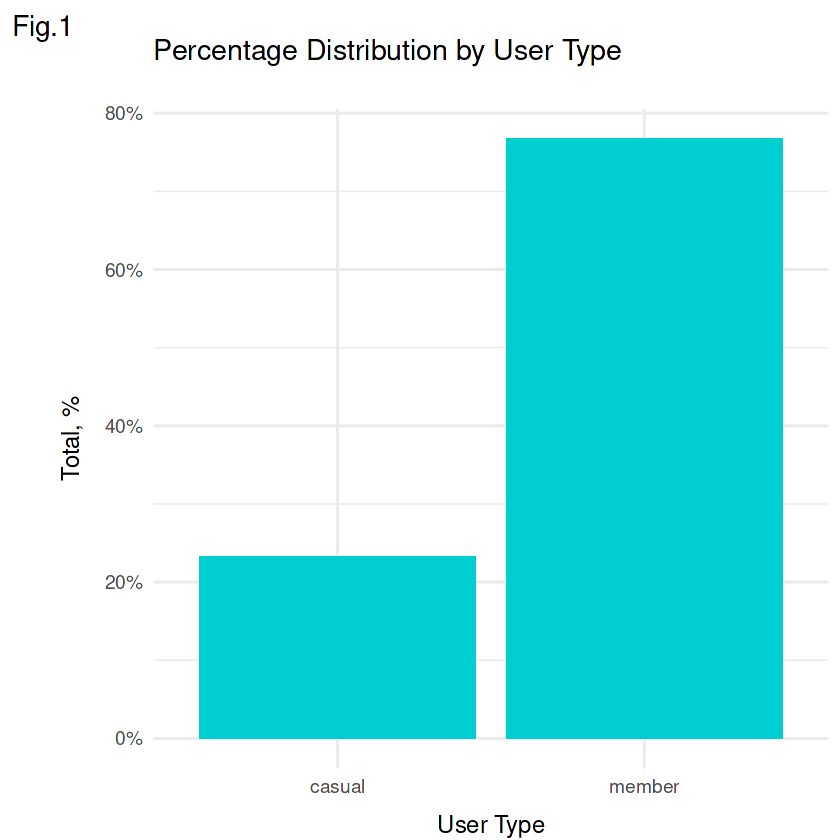

In [36]:
# Calculate the percentage distribution of user types
user_type_counts <- table(all_trips_v2$member_casual)
percentage_distribution <- prop.table(user_type_counts) * 100

# Create a bar plot using ggplot2
ggplot(data = data.frame(User_type = names(percentage_distribution), Percentage = as.numeric(percentage_distribution)), 
  aes(x = User_type, y = Percentage)) +
  geom_bar(stat = "identity", fill = "Dark Turquoise") +
  labs(title = "Percentage Distribution by User Type\n",
       x = "User Type",y = "Total, %", tag="Fig.1") + theme(plot.tag.position = "topleft") +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) +
  theme_minimal(base_size = 14) +
  theme(axis.title.y = element_text(vjust = +3),
    axis.title.x = element_text(vjust = -0.75))

* As shown on Figure 1, the majority (77%) of users consists of members, as compared to casual riders (23%).
* Next, let's visualize the number of rides by rider type and weekdays

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


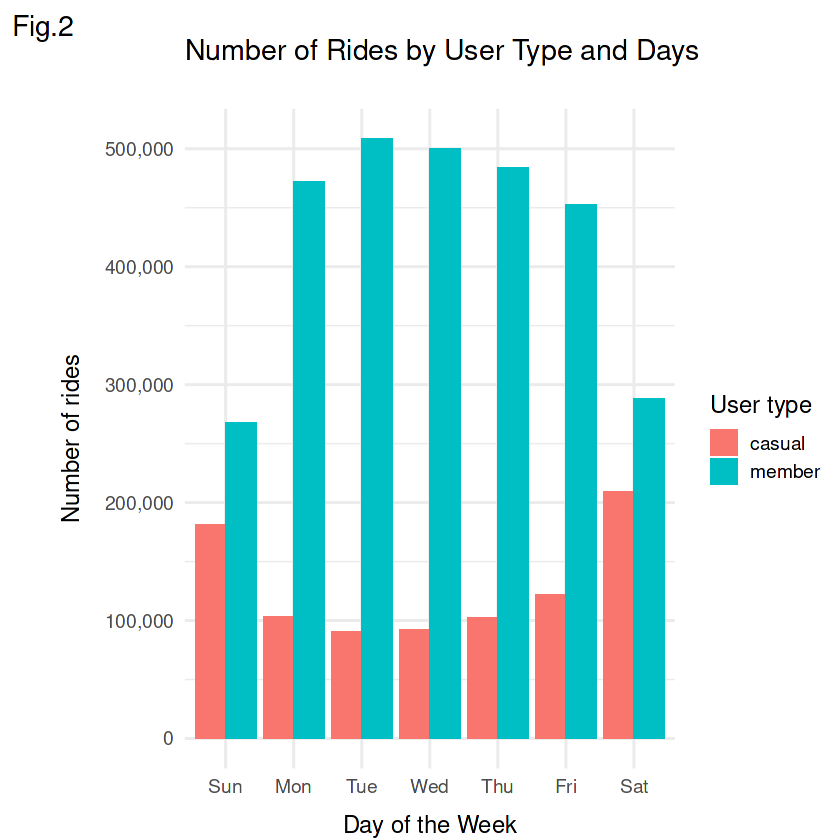

In [37]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>%
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of Rides by User Type and Days\n", x = "Day of the Week", 
       y = "Number of rides", fill="User type", tag="Fig.2") + theme(plot.tag.position = "topleft") +
       scale_y_continuous(labels = scales::comma) +
       theme_minimal(base_size = 14) +
       theme(axis.title.y = element_text(vjust = +3),
       axis.title.x = element_text(vjust = -0.75))

* The number of rides by members is highest during weekdays (Monday to Friday), as opposed to casual riders, who prefer to use bikes more on Saturdays and Sundays.
* Further, let's visualize the number of rides by rider type and months

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


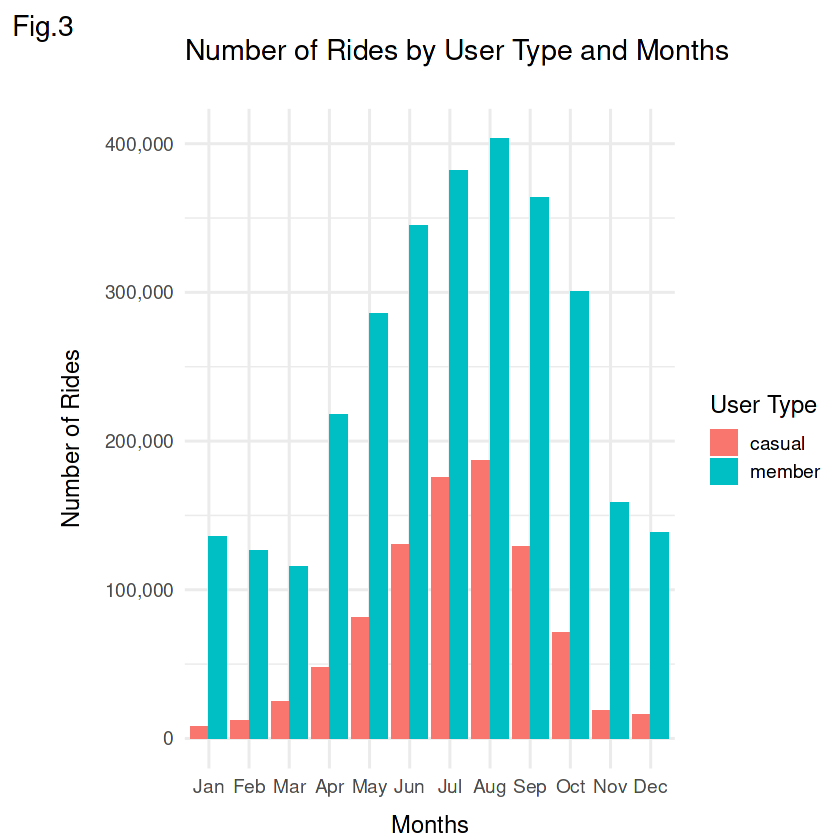

In [38]:
all_trips_v2 %>% 
  mutate(month = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of Rides by User Type and Months\n", x = "Months", 
  y = "Number of Rides", fill="User Type", tag="Fig.3") + theme(plot.tag.position = "topleft") +
  scale_y_continuous(labels = scales::comma) +
  theme_minimal(base_size = 14) +
  theme(axis.title.y = element_text(vjust = +3),
axis.title.x = element_text(vjust = -0.75))

* Here we can observe similar trend in rides between members and casual users during specific months of the year. Both user types generally ride more during warmer months - from April to October. The lowest number of rides can be observed during months of January and February for both user types, assuming that Chicago weather might not be very comfortable for rides during winter months.
* Finally, let's visualize average duration of rides

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


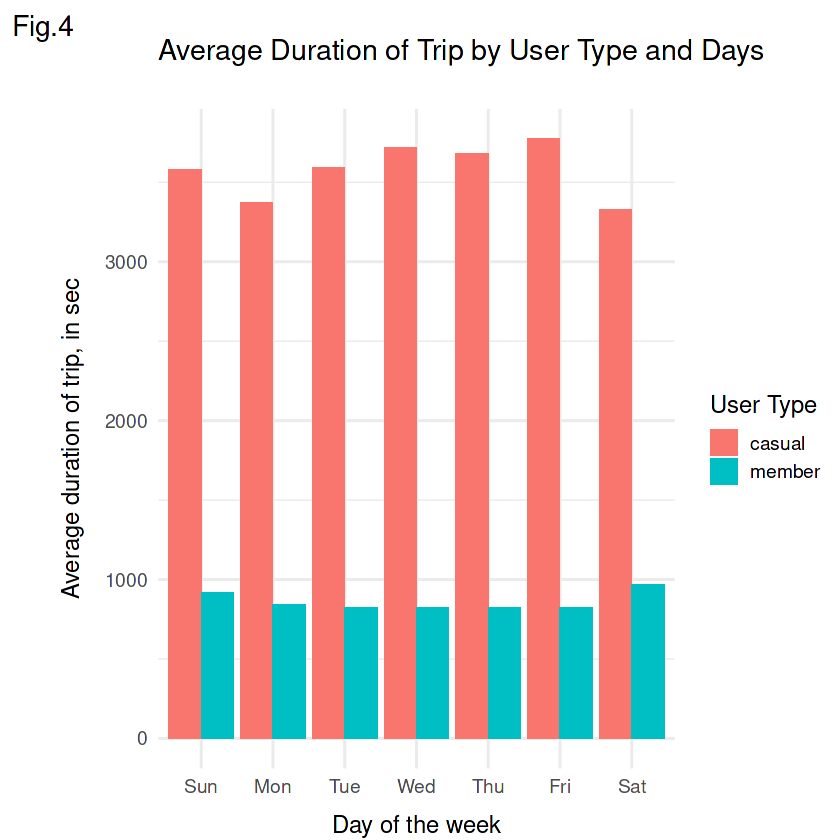

In [39]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Average Duration of Trip by User Type and Days\n", 
       x = "Day of the week", y = "Average duration of trip, in sec", fill="User Type", tag="Fig.4") +
       theme(plot.tag.position = "topleft") +
       theme_minimal(base_size = 14) +
       theme(axis.title.y = element_text(vjust = +3),
       axis.title.x = element_text(vjust = -0.75))

* Average duration of trips for members is similar throughout the week - members typically have shorter rides. In contrast, casual users spend longer time riding a bike, and their trip duration doesn't change significantly throughout the week.

# Step 6: Act

Key stages:

**Providing top three recommendations based on the analysis**

After analysis and visualisation of data the main noticeable insights are as following:

* There is a significantly higher number of member users, as compared to casual riders.
* Casual riders tend to use bicycles more on weekends, whereas members' usage is higher on weekdays. This might mean that casual riders prefer bikes for leisure purposes, as opposed to members, who use bikes more consistently - for work/school/other daily activities.
* Both casuals and members are using bikes more often during warmer months - from April to October; the least common months for usage are January and February.
* Average trip duration has similar stable trends for both user types - casual riders ride for longer periods of time, whereas members- for shorter. This may further support our assumption of usage purposes, which are: leisure for casuals, and work for members.

**Based on the above findings my recommendations would be:**

1. Since casual riders use bikes more during the weekends, it might be beneficial to launch marketing campaigns focused on providing a discount for weekend rides with a purchase of membership.
2. It would be also beneficial to start actively promoting digital media campaigns before and during the peak season - from mid of March until end of October.
3. Due to a longer ride durations by members it might also be a good idea to launch promotions and incentives for membership purchases for those who reach a certain mileage in ride.